In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/김유성/PycharmProjects/2024_1-1AI/iris/iris.data",header=None)
df.columns = ['sepal length','sepal width','petal length','petal width','class']
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
df = df.drop("class",axis=1)
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
X = df.drop("sepal length",axis = 1)
X

,sepal width,petal length,petal width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [27]:
y = df['sepal length']
y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length, Length: 150, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 3) (120,)
(30, 3) (30,)


In [30]:
X_test

,sepal width,petal length,petal width
40,3.5,1.3,0.3
146,2.5,5.0,1.9
38,3.0,1.3,0.2
99,2.8,4.1,1.3
143,3.2,5.9,2.3
116,3.0,5.5,1.8
148,3.4,5.4,2.3
39,3.4,1.5,0.2
135,3.0,6.1,2.3
23,3.3,1.7,0.5


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 0.12258277546894887
평균제곱근오차 0.12258277546894887
평균제곱근오차 0.12258277546894887


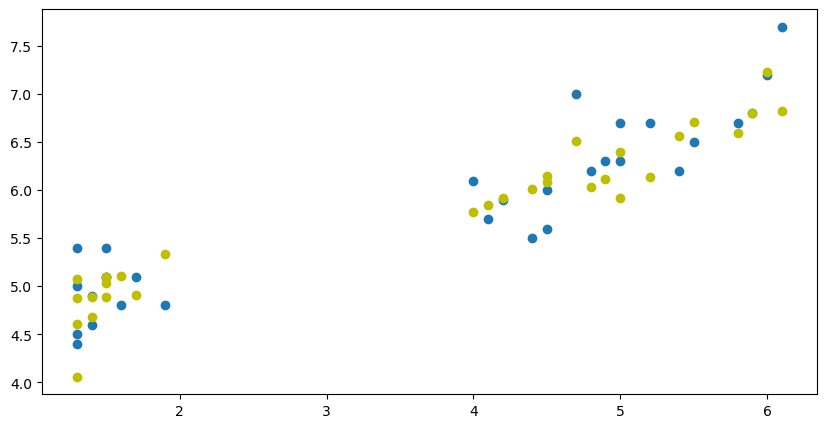

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], y_test, label='y_test') # sepal length와 가장 연관성이 있는 피처가 petal length
plt.scatter(X_test['petal length'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

In [33]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.1871666666666667


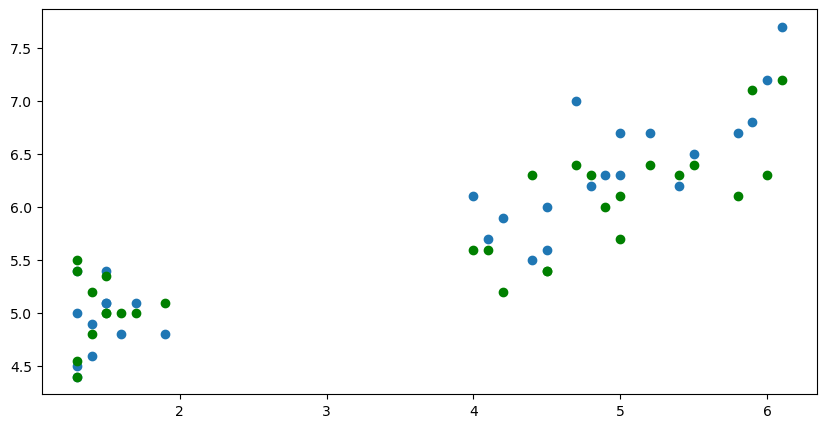

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], y_test, label='y_test')
plt.scatter(X_test['petal length'], dy_preds, c='g', label='dy_preds')
plt.show()

In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.11643073317592556


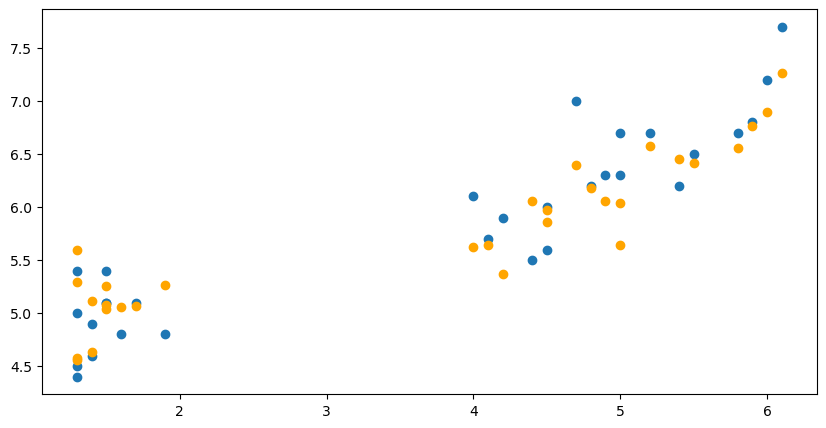

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], y_test, label='y_test')
plt.scatter(X_test['petal length'], ry_preds, c='orange', label='ry_preds')

plt.show() 

In [37]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.12035489238592424


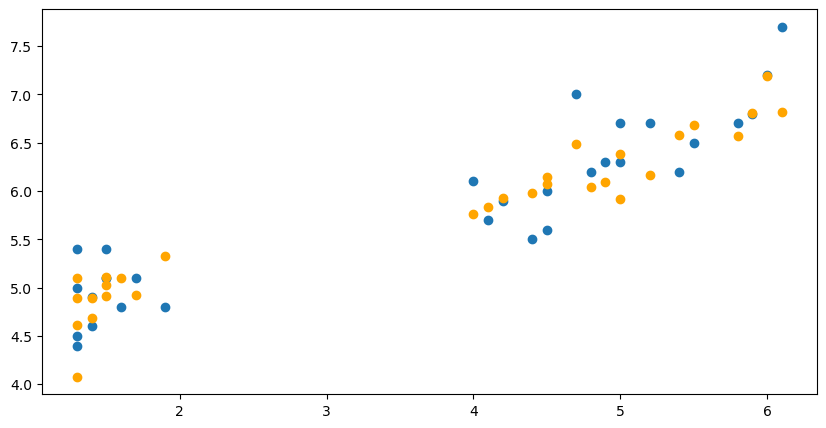

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], y_test, label='y_test')
plt.scatter(X_test['petal length'], ry_preds, c='orange', label='ry_preds')

plt.show()  

In [39]:
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)

# 모델을 사용하여 예측을 수행하고 테스트 세트의 성능을 확인합니다.
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.12035489238592424


In [ ]:
#knn